In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2024.09.5


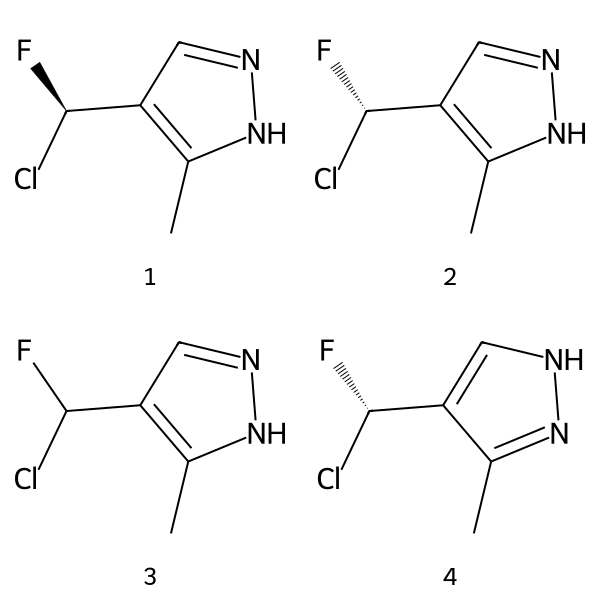

In [2]:
smis = ["Cc1[nH]ncc1[C@H](F)Cl","Cc1[nH]ncc1[C@@H](F)Cl","Cc1[nH]ncc1[CH](F)Cl","Cc1n[nH]cc1[C@@H](F)Cl"]
ms = [Chem.MolFromSmiles(smi) for smi in smis]
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.legendFontSize=24
Draw.MolsToGridImage(ms,legends=[str(i+1) for i in range(len(ms))],molsPerRow=2,subImgSize=(300,300))

In [3]:
import lwreg

# set the name of the database we'll work with:
config = lwreg.utils.defaultConfig()
config['dbname'] = 'jupyter_demo.sqlt'
lwreg.set_default_config(config)

Initialize the database. **Note** that this erases everything in the current database, so be very careful with this command!

In [4]:
lwreg.initdb()

This will destroy any existing information in the registration database.


  are you sure? [yes/no]:  yes


True

Register all of our compounds at once:

In [5]:
# The RDKit standardizer is quite verbose by default, make it be quiet:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')

In [6]:
lwreg.bulk_register(mols=ms)

(1, 2, 3, 4)

Do some queries:

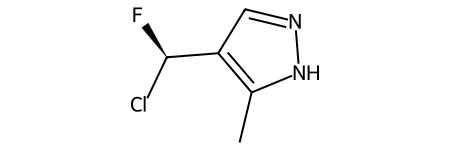

In [7]:
Chem.MolFromSmiles('Cc1[nH]ncc1[C@H](F)Cl')

In [8]:
lwreg.query(smiles='Cc1[nH]ncc1[C@H](F)Cl')

[1]

Query using just the `no_stereo_smiles` layer. This pays attention to tautomers but ignores stereochemistry:

In [9]:
lwreg.query(smiles='Cc1[nH]ncc1[C@H](F)Cl',
            layers=lwreg.utils.HashLayer.NO_STEREO_SMILES)

[1, 2, 3]

Retrieve the structures of the molecules corresponding to that query:

In [10]:
res = lwreg.retrieve(ids=[1,2,3])
len(res)

3

Ids in the retrieve list that don't exist do not show up in the results:

In [11]:
ids = [1,2,3,56,23,-1]
res = lwreg.retrieve(ids=ids)
len(res)

3

In [12]:
type(res)

dict

In [13]:
ids_found = list(res.keys())
ids_found

[1, 2, 3]

In [14]:
set(ids).difference(ids_found)

{-1, 23, 56}

The keys in the dictionary are the molregnos (the registered IDs)and the values are two-tuples with the molecule struture and its format. In this case we're getting mol blocks.

In [15]:
res[1]

('\n     RDKit          2D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 9 9 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 2.775976 0.000000 0.000000 0\nM  V30 2 C 1.275976 0.000000 0.000000 0\nM  V30 3 N 0.394298 1.213525 0.000000 0\nM  V30 4 N -1.032286 0.750000 0.000000 0\nM  V30 5 C -1.032286 -0.750000 0.000000 0\nM  V30 6 C 0.394298 -1.213525 0.000000 0\nM  V30 7 C 0.857824 -2.640110 0.000000 0\nM  V30 8 F -0.145872 -3.754828 0.000000 0\nM  V30 9 Cl 2.325045 -2.951978 0.000000 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 1 1 2\nM  V30 2 1 2 3\nM  V30 3 1 3 4\nM  V30 4 2 4 5\nM  V30 5 1 5 6\nM  V30 6 1 6 7\nM  V30 7 1 7 8 CFG=1\nM  V30 8 1 7 9\nM  V30 9 2 6 2\nM  V30 END BOND\nM  V30 END CTAB\nM  END\n',
 'mol')

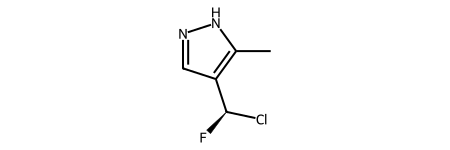

In [16]:
Chem.MolFromMolBlock(res[1][0])

Register a bunch more molecules, these are molecules from ChEMBL:

In [17]:
!head -3 ./demo_data/S1P1_data.csv

"doc_id","molregno","standard_relation","standard_value","standard_units","standard_flag","standard_type","pchembl_value","canonical_smiles","compound_chembl_id"
5839,189018,"=",82,"nM",1,"EC50",7.09,"CCCCCCCCc1ccc(NC(=O)[C@@H](N)COP(=O)(O)O)cc1.OC(=O)C(F)(F)F","CHEMBL332050"
5839,188442,"=",322.1,"nM",1,"EC50",6.49,"CCCCCCCCCCCCCCONC(=O)[C@@H](N)COP(=O)(O)O.OC(=O)C(F)(F)F","CHEMBL115505"


In [18]:
import csv
with open('./demo_data/S1P1_data.csv','r') as inf:
    rdr = csv.reader(inf)
    smis = [x[8] for x in rdr]
    smis.pop(0)
mols = [Chem.MolFromSmiles(x) for x in smis[:100]]

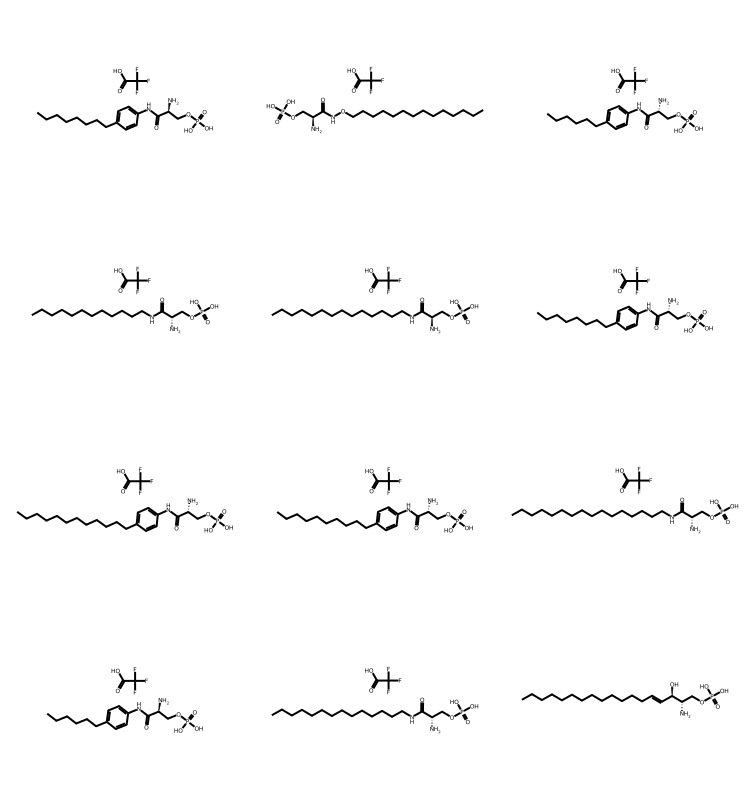

In [19]:
Draw.MolsToGridImage(mols[:12],molsPerRow=3,subImgSize=(250,200))

In [20]:
len(set(Chem.MolToSmiles(m) for m in mols))

96

In [21]:
new_ids = lwreg.bulk_register(mols=mols)

In [22]:
len(new_ids)

100

We end up with a special value in the new_id list for molecules which are duplicates:

In [23]:
new_ids.count(lwreg.RegistrationFailureReasons.DUPLICATE)

4

Finally just retrieve a molecule and look at it:

In [24]:
res = lwreg.retrieve(id=43)
molb = res[43][0]

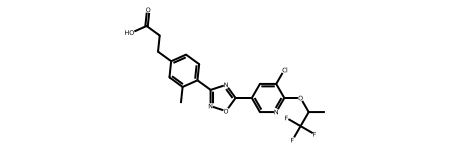

In [25]:
Chem.MolFromMolBlock(molb)